# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("sportsvouchersclaimed.csv")

The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('ABS_SEIFA_LGA.csv')
seifa = seifa[seifa.LGA_2011.astype(str).str[0]=='4']
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga

<ipython-input-3-9cc930d247e6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO

This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')

In [6]:
sa_vouchers_scores.groupby(['Participant_LGA'])



Number of vouchers distributed in LGA's:


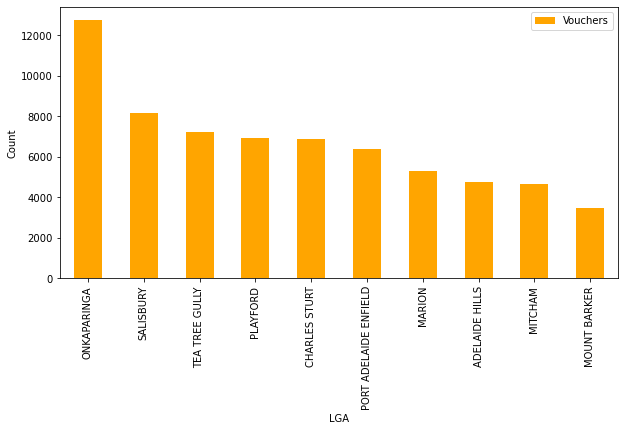

In [7]:
#Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?

plt.figure(figsize=(10,5))
sa_vouchers_scores.Participant_LGA.value_counts().head(10).plot(kind="bar",color="orange",label="Vouchers")
plt.xlabel("LGA")
plt.ylabel("Count")
plt.legend()
print("\n\nNumber of vouchers distributed in LGA's:")



Number of vouchers distributed in LGA's (All LGAs):


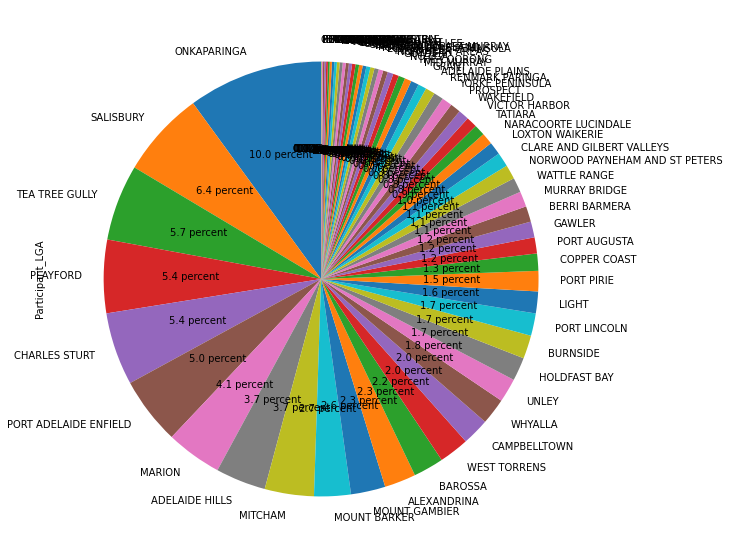

In [8]:
plt.figure(figsize=(10,10))
sa_vouchers_scores.Participant_LGA.value_counts().plot.pie(startangle=90,autopct="%.1f percent")
print("\n\nNumber of vouchers distributed in LGA's (All LGAs):")



Vouchers redeemed for each sport:


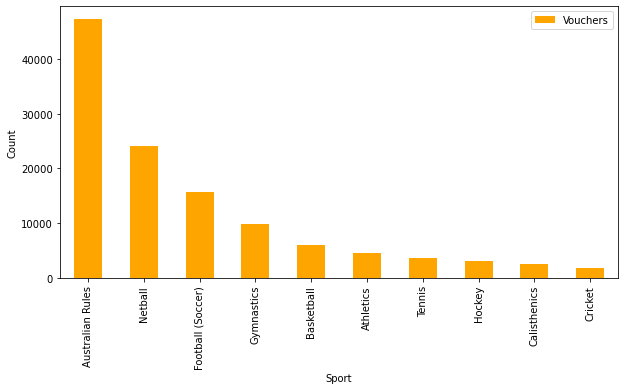

In [9]:
#Now for Sports
plt.figure(figsize=(10,5))
sa_vouchers_scores.Voucher_Sport.value_counts().head(10).plot(kind="bar",color="orange",label="Vouchers")
plt.xlabel("Sport")
plt.ylabel("Count")
plt.legend()
print("\n\nVouchers redeemed for each sport:")



Vouchers redeemed for each sport (All sports):


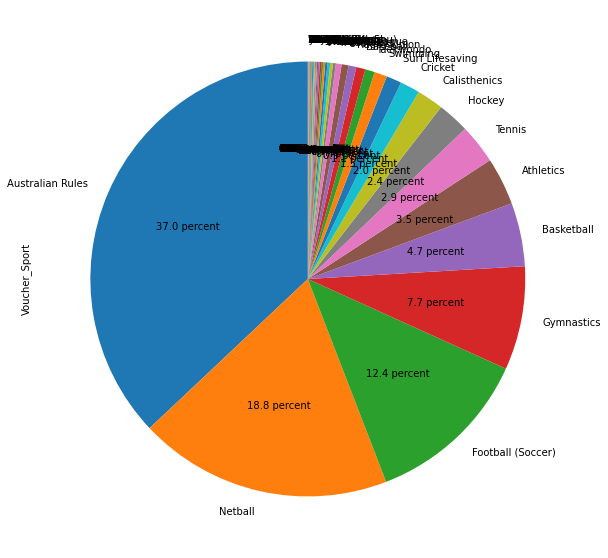

In [10]:
plt.figure(figsize=(10,10))
sa_vouchers_scores.Voucher_Sport.value_counts().plot.pie(startangle=90,autopct="%.1f percent")
print("\n\nVouchers redeemed for each sport (All sports):")

In [11]:
print("Number of Vouchers redeemed in each year:")
print(sa_vouchers_scores.Voucher_Claim_Year.value_counts())

Number of Vouchers redeemed in each year:
2016    51959
2015    43197
2017    32370
Name: Voucher_Claim_Year, dtype: int64


In [12]:
print("Total number of vouchers used in SA: {}".format(sa_vouchers_scores['Participant_ID'].value_counts().sum()))

Total number of vouchers used in SA: 127526


In [13]:
print("From the summary above, the regions (LGA's) with the highest uses of sport vouchers are ONKAPARINGA, followed by\n"
"SALISBURY, TEA TREE GULLY, PLAYFORD and CHARLES STURT. The most vouchers used for a sport are Australian Rules "
"followed by Netball, Football, Gymnastics and Basketball.\n")

print("The sports with the lowest uses of sport vouchers are FRANKLIN HARBOUR then ORROROO/CARRIETON, FLINDERS RANGES \n"
"PETERBOROUGH and COOBER PEDY. The least vouchers used for a sport are Shooting, Paralymics, Bowls, Dancesport\nand Kung Fu.\n")

print("The year that the most vouchers were used in was in 2016 with 51959 vouchers.")

From the summary above, the regions (LGA's) with the highest uses of sport vouchers are ONKAPARINGA, followed by
SALISBURY, TEA TREE GULLY, PLAYFORD and CHARLES STURT. The most vouchers used for a sport are Australian Rules followed by Netball, Football, Gymnastics and Basketball.

The sports with the lowest uses of sport vouchers are FRANKLIN HARBOUR then ORROROO/CARRIETON, FLINDERS RANGES 
PETERBOROUGH and COOBER PEDY. The least vouchers used for a sport are Shooting, Paralymics, Bowls, Dancesport
and Kung Fu.

The year that the most vouchers were used in was in 2016 with 51959 vouchers.


Spread of most popular sports in each LGA:


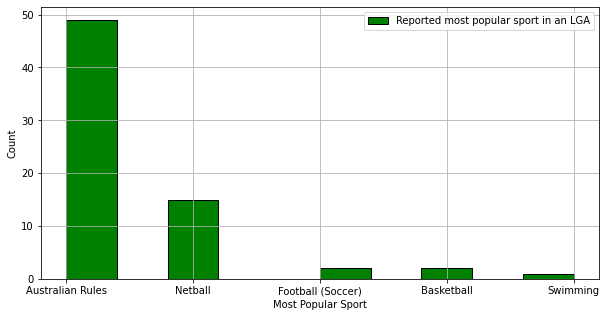

In [14]:
#Are some sports more popular in different parts of the state?

Sport = [0] * len(sa_vouchers_scores.Participant_LGA.unique())
LGA_pop = [0] * len(sa_vouchers_scores.Participant_LGA.unique())

def most_popular_sport(LGA,i):
    while i < len(LGA):
        Sport[i] = sa_vouchers_scores[sa_vouchers_scores.Participant_LGA == LGA[i]].Voucher_Sport.value_counts().idxmax()
        LGA_pop[i] = LGA[i]
        i = i + 1
    
most_popular_sport(sa_vouchers_scores.Participant_LGA.unique(),0)
combine = {'LGA':LGA_pop,'Sport':Sport}
df = pd.DataFrame(data=combine)

plt.figure(figsize=(10,5))
df["Sport"].hist(color='green', edgecolor='black', label="Reported most popular sport in an LGA")
plt.xlabel('Most Popular Sport')
plt.ylabel('Count')
plt.legend()
print("Spread of most popular sports in each LGA:")

In [15]:
print("From the graph above, it is evident that some sports are more popular in different parts of the state. The "
      "most\nfrequently reported popular sport in an LGA is Australian Rules, followed by Netball with about 1/3 count of\n"
      "Australian Rules. Only a very few LGAs has reported Football (soccer), Basketball and Swimming as the most\npopular "
      "sport in their region, with each of these sports only reporting as the most popular sport in less\nthan 5 LGAs.")

From the graph above, it is evident that some sports are more popular in different parts of the state. The most
frequently reported popular sport in an LGA is Australian Rules, followed by Netball with about 1/3 count of
Australian Rules. Only a very few LGAs has reported Football (soccer), Basketball and Swimming as the most
popular sport in their region, with each of these sports only reporting as the most popular sport in less
than 5 LGAs.


In [16]:
#Are any LGA's over/under represented in their use of vouchers? 

LGA_pop = [0] * len(sa_vouchers_scores.Participant_LGA.unique())
Population = [0] * len(sa_vouchers_scores.Participant_LGA.unique())
Amount_vo = [0] * len(sa_vouchers_scores.Participant_LGA.unique())
Voucher_Use_Percent = [0] * len(sa_vouchers_scores.Participant_LGA.unique())

def represent(LGA,i):
    while i < len(LGA):
        LGA_pop[i] = LGA[i]
        Population[i] = sa_vouchers_scores[sa_vouchers_scores.Participant_LGA == LGA[i]].Population.max()
        Amount_vo[i] = sa_vouchers_scores[sa_vouchers_scores.Participant_LGA == LGA[i]].value_counts().sum()
        Voucher_Use_Percent[i] = Amount_vo[i]/Population[i]
        i = i + 1

represent(sa_vouchers_scores.Participant_LGA.unique(),0)
combine1 = {'Population':Population, 'Vouchers':Amount_vo, 'Voucher_use_%':Voucher_Use_Percent}

df1 = pd.DataFrame(data=combine1,index=LGA_pop)
df1 = df1.dropna(axis='rows') #drop nan values
df1.head()

,Population,Vouchers,Voucher_use_%
ONKAPARINGA,159517.0,12673,0.079446
ADELAIDE,19606.0,296,0.015097
YORKE PENINSULA,11046.0,975,0.088267
CHARLES STURT,104922.0,6832,0.065115
PORT ADELAIDE ENFIELD,112797.0,6280,0.055675


Ranked LGA by Population:


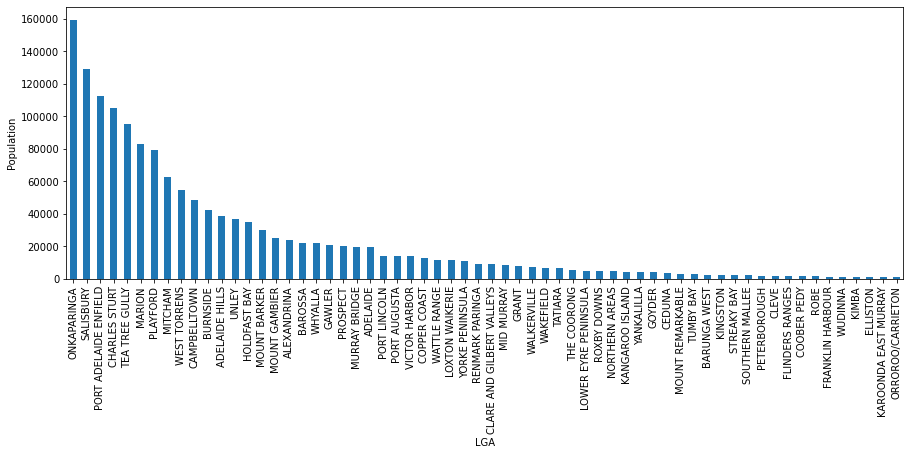

In [17]:
df1.sort_values(by=["Population"],ascending=False)["Population"].plot(kind="bar",figsize=(15,5))
plt.ylabel('Population')
plt.xlabel('LGA')
print("Ranked LGA by Population:")

Ranked LGA by Voucher use:


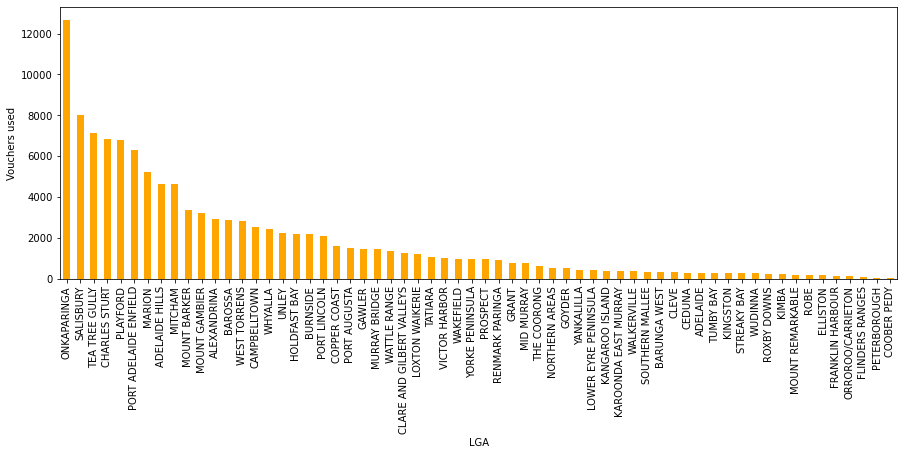

In [18]:
df1.sort_values(by=["Vouchers"],ascending=False)["Vouchers"].plot(kind="bar",figsize=(15,5),color="orange")
plt.ylabel('Vouchers used')
plt.xlabel('LGA')
print("Ranked LGA by Voucher use:")

Spread of Voucher use percentage (Vouchers used vs Population) in LGA:


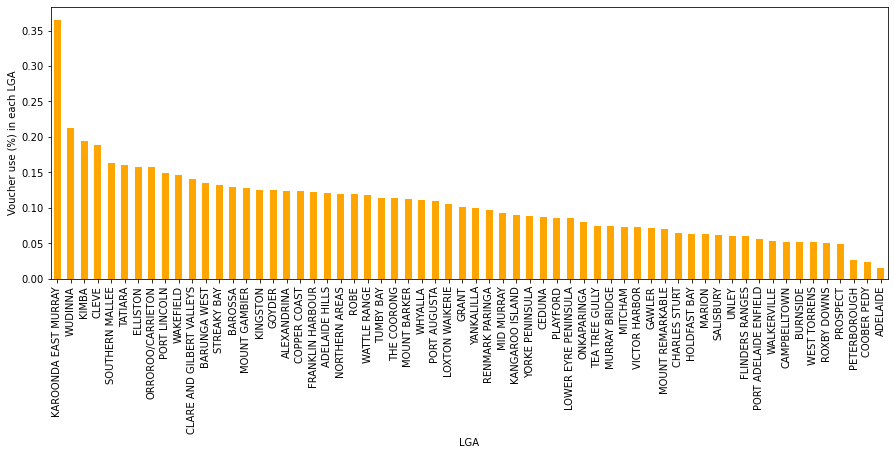

In [19]:
df1.sort_values(by=["Voucher_use_%"],ascending=False)["Voucher_use_%"].plot(kind="bar",color="orange",figsize=(15,5))
plt.ylabel('Voucher use (%) in each LGA')
plt.xlabel('LGA')
print("Spread of Voucher use percentage (Vouchers used vs Population) in LGA:")

In [20]:
print("LGA Voucher use Percentage (%) has a mean of {:.2f}% and standard deviation of {:.2f}%".format(df1["Voucher_use_%"].mean(),df1["Voucher_use_%"].std()))

LGA Voucher use Percentage (%) has a mean of 0.10% and standard deviation of 0.05%


Spread of Voucher use percentage (Vouchers used vs Population) in LGA (considered over-represented (outside mean +/- std range)):


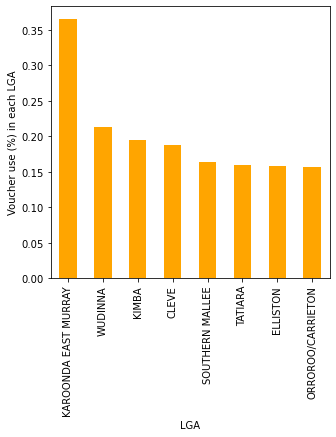

In [21]:
df1.sort_values(by=["Voucher_use_%"],ascending=False).head(8)["Voucher_use_%"].plot(kind="bar",color="orange",figsize=(5,5))
plt.ylabel('Voucher use (%) in each LGA')
plt.xlabel('LGA')
print("Spread of Voucher use percentage (Vouchers used vs Population) in LGA (considered over-represented (outside mean +/- std range)):")

Spread of Voucher use percentage (Vouchers used vs Population) in LGA (considered under-represented (outside mean +/- std range)):


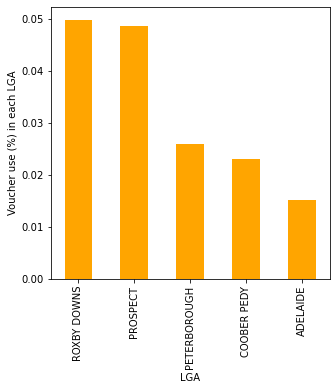

In [22]:
df1.sort_values(by=["Voucher_use_%"],ascending=False).tail(5)["Voucher_use_%"].plot(kind="bar",color="orange",figsize=(5,5))
plt.ylabel('Voucher use (%) in each LGA')
plt.xlabel('LGA')
print("Spread of Voucher use percentage (Vouchers used vs Population) in LGA (considered under-represented (outside mean +/- std range)):")

In [23]:
print("We can calculate whether an LGA is over represented or under representated by looking at an LGA's population"
      " against its voucher use and calculate it as a percentage. From the graphs above, we can see that most LGA's"
      " fall into the\npercentage of 0.15-0.5% range of Voucher usage vs population. Outside these ranges, we can consider an LGA"
      " to have been over represented and under represented.")

print("\nLGA's that have been over represented include: \n{} ".format(df1.sort_values(by=["Voucher_use_%"],ascending=False).head(8).index))
print("\nLGA's that have been under represented include: \n{} ".format(df1.sort_values(by=["Voucher_use_%"],ascending=False).tail(5).index))

We can calculate whether an LGA is over represented or under representated by looking at an LGA's population against its voucher use and calculate it as a percentage. From the graphs above, we can see that most LGA's fall into the
percentage of 0.15-0.5% range of Voucher usage vs population. Outside these ranges, we can consider an LGA to have been over represented and under represented.

LGA's that have been over represented include: 
Index(['KAROONDA EAST MURRAY', 'WUDINNA', 'KIMBA', 'CLEVE', 'SOUTHERN MALLEE',
       'TATIARA', 'ELLISTON', 'ORROROO/CARRIETON'],
      dtype='object') 

LGA's that have been under represented include: 
Index(['ROXBY DOWNS', 'PROSPECT', 'PETERBOROUGH', 'COOBER PEDY', 'ADELAIDE'], dtype='object') 


In [24]:
#Is there a relationship between any of the SEIFA measures and voucher use in an LGA?
#IEO IER IRSAD IRSD ect.

IEO = [0] * len(sa_vouchers_scores.Participant_LGA.unique())
IER = [0] * len(sa_vouchers_scores.Participant_LGA.unique())
IRSAD = [0] * len(sa_vouchers_scores.Participant_LGA.unique())
IRSD = [0] * len(sa_vouchers_scores.Participant_LGA.unique())
Amount_vo = [0] * len(sa_vouchers_scores.Participant_LGA.unique())
LGA_pop = [0] * len(sa_vouchers_scores.Participant_LGA.unique())

def most_popular_sport(LGA,i):
    while i < len(LGA):
        LGA_pop[i] = LGA[i]
        Amount_vo[i] = sa_vouchers_scores[sa_vouchers_scores.Participant_LGA == LGA[i]].value_counts().sum()/10
        IEO[i] = sa_vouchers_scores[sa_vouchers_scores.Participant_LGA == LGA[i]].IEO.max()   
        IER[i] = sa_vouchers_scores[sa_vouchers_scores.Participant_LGA == LGA[i]].IER.max()  
        IRSAD[i] = sa_vouchers_scores[sa_vouchers_scores.Participant_LGA == LGA[i]].IRSAD.max()
        IRSD[i] = sa_vouchers_scores[sa_vouchers_scores.Participant_LGA == LGA[i]].IRSD.max()
        i = i + 1
    
most_popular_sport(sa_vouchers_scores.Participant_LGA.unique(),0)
combine = {'Vouchers':Amount_vo, 'IEO':IEO, 'IER':IER, 'IRSAD':IRSAD, 'IRSD':IRSD}
df2 = pd.DataFrame(data=combine,index=LGA_pop)
df2 = df2.dropna(axis='rows') #drop nan values/no electorate
df2.head()

,Vouchers,IEO,IER,IRSAD,IRSD
ONKAPARINGA,1267.3,996.0,996.0,975.0,993.0
ADELAIDE,29.6,874.0,874.0,1036.0,1013.0
YORKE PENINSULA,97.5,969.0,969.0,933.0,952.0
CHARLES STURT,683.2,957.0,957.0,971.0,976.0
PORT ADELAIDE ENFIELD,628.0,921.0,921.0,929.0,930.0


Vouchers used vs IEO and IER:


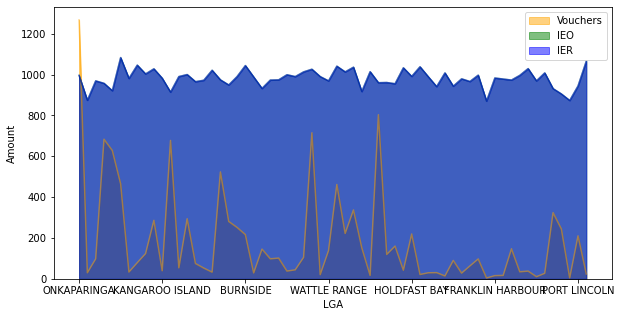

In [25]:
df2[["Vouchers","IEO","IER"]].plot.area(stacked=False,color=("orange","green","blue"),figsize=(10,5))
plt.ylabel('Amount')
plt.xlabel('LGA')
print("Vouchers used vs IEO and IER:")

Vouchers used vs IRSAD and IRSD:


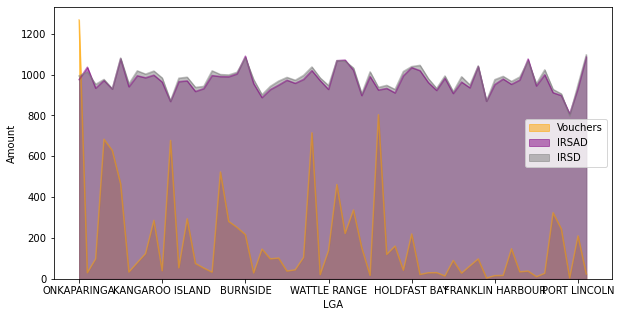

In [26]:
df2[["Vouchers","IRSAD","IRSD"]].plot.area(stacked=False,color=("orange","purple","grey"),figsize=(10,5))
plt.ylabel('Amount')
plt.xlabel('LGA')
print("Vouchers used vs IRSAD and IRSD:")

In [27]:
print("From the results above, these is no clear relationship between any of the SEIFA measures and voucher use in an LGA.\n"
     "However from the area plots above, these is a relationship between certain SEIFA measures such as IEO matching\nIER"
     " and IRSAD closely matching with IRSD.")

From the results above, these is no clear relationship between any of the SEIFA measures and voucher use in an LGA.
However from the area plots above, these is a relationship between certain SEIFA measures such as IEO matching
IER and IRSAD closely matching with IRSD.


## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [28]:
qld_vouchers = pd.read_csv('round1-redeemed_get_started_vouchers.csv')

In [29]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')

<ipython-input-29-e9d987045e0c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()




Number of vouchers distributed in LGA's:


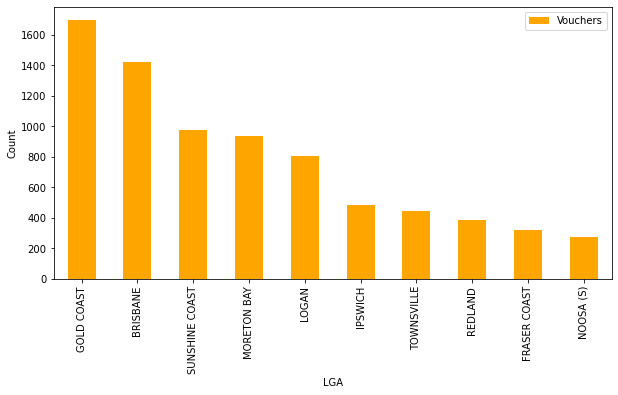

In [30]:
plt.figure(figsize=(10,5))
qld_vouchers_scores["LGA"].value_counts().head(10).plot(kind="bar",color="orange",label="Vouchers")
plt.xlabel("LGA")
plt.ylabel("Count")
plt.legend()
print("\n\nNumber of vouchers distributed in LGA's:")



Vouchers redeemed for each sport:


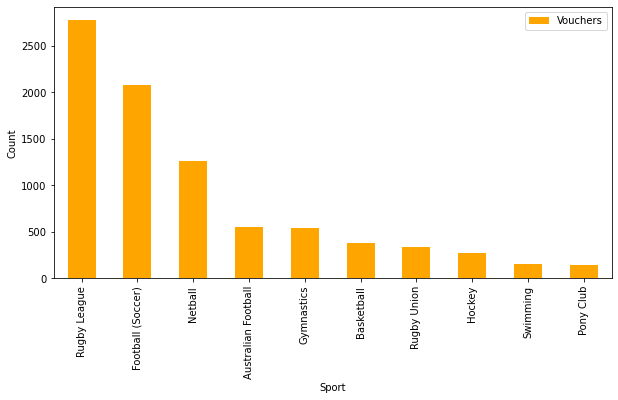

In [31]:
#To do a comparable analysis you would need to map the activity names onto those from South Australia.
plt.figure(figsize=(10,5))
qld_vouchers_scores['Participation Activity'].value_counts().head(10).plot(kind="bar",color="orange",label="Vouchers")
plt.xlabel("Sport")
plt.ylabel("Count")
plt.legend()
print("\n\nVouchers redeemed for each sport:")

In [32]:
print("Total number of vouchers used : {}".format(qld_vouchers_scores["Application Number"].value_counts().sum()))

Total number of vouchers used : 9507


In [33]:
print("The most vouchers used in an LGA is in GOLD COAST and the most vouchers used for a sport is Rugby League.")

The most vouchers used in an LGA is in GOLD COAST and the most vouchers used for a sport is Rugby League.


Spread of most popular sports in each LGA:


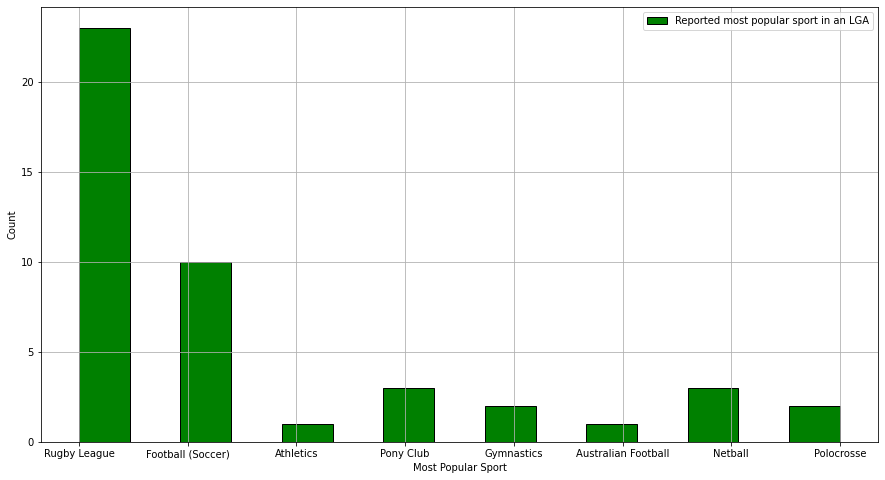

In [34]:
Sport = [0] * len(qld_vouchers_scores["LGA"].unique())
LGA_pop = [0] * len(qld_vouchers_scores["LGA"].unique())

def most_popular_sport(LGA,i):
    while i < len(LGA):
        Sport[i] = qld_vouchers_scores[qld_vouchers_scores["LGA"]  == LGA[i]]['Participation Activity'].value_counts().idxmax()
        LGA_pop[i] = LGA[i]
        i = i + 1
    
most_popular_sport(qld_vouchers_scores["LGA"].unique(),0)
combine = {'LGA':LGA_pop,'Sport':Sport}
df = pd.DataFrame(data=combine)

plt.figure(figsize=(15,8))
df["Sport"].hist(color='green', edgecolor='black', label="Reported most popular sport in an LGA", bins=15)
plt.xlabel('Most Popular Sport')
plt.ylabel('Count')
plt.legend()
print("Spread of most popular sports in each LGA:")

In [35]:
print("From the results above, it is clear that Rugby League was recorded as the most popular sport in the most "
      "LGA's,\nfollowed by Football.")

From the results above, it is clear that Rugby League was recorded as the most popular sport in the most LGA's,
followed by Football.


In [36]:
print("From our results above, we can create a comparable analysis to highlight the diffferences between the Federal\nGovernment"
      " Sport Vouchers program in South Australia (SA) with Queensland's Get Started Sport Voucher program (QU):\n")

print("It is clear that voucher use in SA was more popular in sports such as Australian Rules and Netball"
     " while in\nQU, vouchers were used for sports such as Rugby League and Football (Soccer). However sports"
     " such as Netball,\nFootball (Soccer), Gymnastics, Basketball and Hockey shared similar ranking in voucher use in their state,\n"
     "with all of these sports being ranked in the top 10 most vouchers used for a single sport in both states.\n")

print("In SA, Australian Rules dominated almost 50 LGA's as the most popular sport in terms of vouchers used for a single\nsport"
     " while in QU, Rugby League was recorded as the most popular sport in almost 25 LGA's.\n")

print("Even with the significantly differing numbers of vouchers used in these different programs, with SA recording 127526 voucher uses"
     " while QU only recorded 9507, we can still observe from our results that SA and QU have some similarities with"
     " the spread of vouchers vs sports, with some sports being popular in both states and some differences, with some"
     "dominant sports in one state being unpopular in another state.")

From our results above, we can create a comparable analysis to highlight the diffferences between the Federal
Government Sport Vouchers program in South Australia (SA) with Queensland's Get Started Sport Voucher program (QU):

It is clear that voucher use in SA was more popular in sports such as Australian Rules and Netball while in
QU, vouchers were used for sports such as Rugby League and Football (Soccer). However sports such as Netball,
Football (Soccer), Gymnastics, Basketball and Hockey shared similar ranking in voucher use in their state,
with all of these sports being ranked in the top 10 most vouchers used for a single sport in both states.

In SA, Australian Rules dominated almost 50 LGA's as the most popular sport in terms of vouchers used for a single
sport while in QU, Rugby League was recorded as the most popular sport in almost 25 LGA's.

Even with the significantly differing numbers of vouchers used in these different programs, with SA recording 127526 voucher uses whil